In [1]:
Ok = """Topics Covered in this Chapter:-
1) Encoding Dummy Variables using get_dummies()from Pandas
2) Encoding Seemingly integer data to dummy Variables
3) Binning and Descritization for Linear Models
4) Univariate Non-linear Transformations
5) Automatic Feature Selection 
   A)•	univariate statistics 
   B)•	model-based selection and
   C)•	iterative selection
"""
print(Ok)

Topics Covered in this Chapter:-
1) Encoding Dummy Variables using get_dummies()from Pandas
2) Encoding Seemingly integer data to dummy Variables
3) Binning and Descritization for Linear Models
4) Univariate Non-linear Transformations
5) Automatic Feature Selection 
   A)•	univariate statistics 
   B)•	model-based selection and
   C)•	iterative selection



In [2]:
# This convention would be followed by default in the book
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [3]:
from IPython.display import Markdown, display
def printbold(string):
    display(Markdown(string))

printbold("**Here we go!!**")

**Here we go!!**

In [4]:
printbold("**Dummy Variables: get_dummies() of pandas and OneHotEncoder of skealrn**")

**Dummy Variables: get_dummies() of pandas and OneHotEncoder of skealrn**

In [5]:
import pandas as pd
# The file has no headers naming the columns, so we pass header=None and provide the column names explicitly in "names"
data = pd.read_csv(
"E:/Analytics Notes/Books Notes/Intro ML with Python/dataset/adult.csv", header=None, index_col=False,
names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
'marital-status', 'occupation', 'relationship', 'race', 'gender',
'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
'income'])

# For illustration purposes, we only select some of the columns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
'occupation', 'income']]
# IPython.display allows nice output formatting within the Jupyter notebook
display(data.head())



,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [6]:
ok = """value_counts() would give label counts of a categorical variable. We can see get_dummies() wont touch numeric values and original categorical would be replaced with labeled categories. We can either use get_dummies() of pandas or OneHotEncoder of sklearn library to do one hot encoding."""
print(ok)
print("\n")
print(data.gender.value_counts())
print("\n")
# list with columns would print the column names
print("Original features:\n", list(data.columns), "\n")

print("\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))
print("\n")
data_dummies.head()


value_counts() would give label counts of a categorical variable. We can see get_dummies() wont touch numeric values and original categorical would be replaced with labeled categories. We can either use get_dummies() of pandas or OneHotEncoder of sklearn library to do one hot encoding.


 Male      21790
 Female    10771
Name: gender, dtype: int64


Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 



Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [7]:
ok = """Here pandas will take all variable from age to Occupation_transport including Occupation_transport. We can also use iloc with data.iloc[:,4:9] where age index is 4 and so on. loc is used for string and iloc for integer indexing"""
print(ok)
print("\n")
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
print(features.head())
# Extract NumPy arrays
print("\n")
X = features.values #it will make a list of lists of all rows.
y = data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

Here pandas will take all variable from age to Occupation_transport including Occupation_transport. We can also use iloc with data.iloc[:,4:9] where age index is 4 and so on. loc is used for string and iloc for integer indexing


   age  hours-per-week  workclass_ ?  workclass_ Federal-gov  \
0   39              40             0                       0   
1   50              13             0                       0   
2   38              40             0                       0   
3   53              40             0                       0   
4   28              40             0                       0   

   workclass_ Local-gov  workclass_ Never-worked  workclass_ Private  \
0                     0                        0                   0   
1                     0                        0                   0   
2                     0                        0                   1   
3                     0                        0                   1   
4                     0  

In [8]:
ok = """In this example, we called get_dummies on a DataFrame containing both the training and the test data. This is important to ensure categorical values are represented in the same way in the training & test set. Since we use numpy arrays for model training and testing, it takes only indexes & not var names.So its important to creat dummies together."""
print(ok)
print("\n")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =0)
logreg = LogisticRegression()
logreg.fit(X, y)
print("Test Score of Logistic Regression {:.2f}".format(logreg.score(X_test, y_test)))


In this example, we called get_dummies on a DataFrame containing both the training and the test data. This is important to ensure categorical values are represented in the same way in the training & test set. Since we use numpy arrays for model training and testing, it takes only indexes & not var names.So its important to creat dummies together.


Test Score of Logistic Regression 0.81


In [9]:
printbold("**Encoding Integer variables into dummies**")

**Encoding Integer variables into dummies**

In [10]:
ok = """The get_dummies function in pandas treats all numbers as continuous and will not create dummy variables for them. To get around this, we can either use scikitlearn’s OneHotEncoder, for which w can specify which variables are continuous and which are discrete, or convert numeric columns in the DataFrame to strings. Here we 1st convert Integer Feature to str type and then get_dummies() works fine"""
print(ok)

demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

The get_dummies function in pandas treats all numbers as continuous and will not create dummy variables for them. To get around this, we can either use scikitlearn’s OneHotEncoder, for which w can specify which variables are continuous and which are discrete, or convert numeric columns in the DataFrame to strings. Here we 1st convert Integer Feature to str type and then get_dummies() works fine


,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


In [11]:
printbold("**Binning and Descritization for Linear Models**")

**Binning and Descritization for Linear Models**

linear models can only model linear relationships, which are lines in the case of a single feature. The decision tree can build a much more complex model of the data. However, this is strongly dependent on the representation of the data. One way to make linear models more powerful on continuous data is to use binning (also known as discretization) of the feature to split it up into multiple features which we do in next block of code




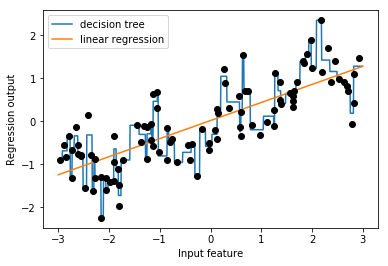

In [12]:
ok = """linear models can only model linear relationships, which are lines in the case of a single feature. The decision tree can build a much more complex model of the data. However, this is strongly dependent on the representation of the data. One way to make linear models more powerful on continuous data is to use binning (also known as discretization) of the feature to split it up into multiple features which we do in next block of code"""
print(ok)
print("\n")
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]



Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


X_binned.shape: (100, 10)


Here we have converted numeric variable into 10 bins and use these 10 bins as inputs features. Now we see that, our linear regression gives as good results as decision tree. We convert numeric variables into bins in case they dont have linear relationship with response feature. After conversion into diff bins, regression gives good results.


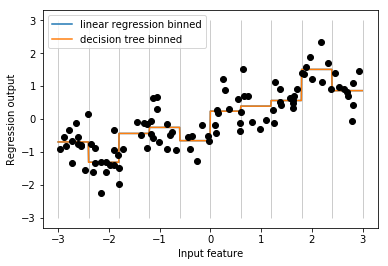

In [13]:
bins = np.linspace(-3, 3, 11) # Here we 10 bins which has a range from -3 to 2
print("bins: {}".format(bins))
print("\n")

which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])
print("\n")

from sklearn.preprocessing import OneHotEncoder
# transform using the OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)
# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

print("\n")
print("X_binned.shape: {}".format(X_binned.shape))

print("\n")
line_binned = encoder.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

ok = """Here we have converted numeric variable into 10 bins and use these 10 bins as inputs features. Now we see that, our linear regression gives as good results as decision tree. We convert numeric variables into bins in case they dont have linear relationship with response feature. After conversion into diff bins, regression gives good results."""
print(ok)

In [14]:
printbold("**Univariate Non-linear Transformations**")
ok = """We either convert numeric data into bins or transorm into log, square-root, cube-root, or sin etc. The idea here is to make the distribution look gaussian (normal curve). This is for linear regression
For right-skewed data—tail is on the right, positive skew—, common transformations include square root, cube root, and log.
For left-skewed data—tail is on the left, negative skew—, common transformations include square root (constant – x), cube root (constant – x), and log (constant – x).
Because log (0) is undefined—as is the log of any negative number—, when using a log transformation, a constant should be added to all values to make them all positive before transformation.  It is also sometimes helpful to add a constant when using other transformations.
Another approach is to use a general power transformation, such as Tukey’s Ladder of Powers or a Box–Cox transformation.  These determine a lambda value, which is used as the power coefficient to transform values.  X.new = X ^ lambda for Tukey, and X.new = (X ^ lambda – 1) / lambda for Box–Cox.
More here: http://rcompanion.org/handbook/I_12.html
."""
print(ok)

**Univariate Non-linear Transformations**

We either convert numeric data into bins or transorm into log, square-root, cube-root, or sin etc. The idea here is to make the distribution look gaussian (normal curve). This is for linear regression
For right-skewed data—tail is on the right, positive skew—, common transformations include square root, cube root, and log.
For left-skewed data—tail is on the left, negative skew—, common transformations include square root (constant – x), cube root (constant – x), and log (constant – x).
Because log (0) is undefined—as is the log of any negative number—, when using a log transformation, a constant should be added to all values to make them all positive before transformation.  It is also sometimes helpful to add a constant when using other transformations.
Another approach is to use a general power transformation, such as Tukey’s Ladder of Powers or a Box–Cox transformation.  These determine a lambda value, which is used as the power coefficient to transform values.  X.new = X ^ lambda f

 Here np.bincount will count appearance of all values starting 0,1,2 etc. Here we see count for 1st feature(0).


Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5,0,'Value')

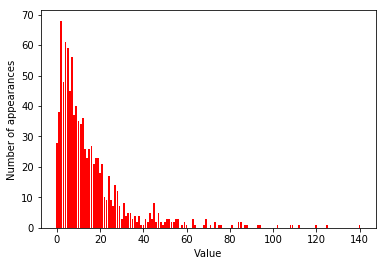

In [15]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)


ok = """ Here np.bincount will count appearance of all values starting 0,1,2 etc. Here we see count for 1st feature(0)."""
print(ok)
print("\n")

print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))



bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='r')
plt.ylabel("Number of appearances")
plt.xlabel("Value")



In [16]:
Ok = """Log10(0)= indefined. In case there is zero in a variable we wann take log. We always take log10(x+1) instead.
suppose, log10(x+1) = a, which can be written as x+1 = 10^a. and now x = 10^a -1. If we want actual values after prediction, we take pred value as power of 10 and minus 1."""

print(Ok)

Log10(0)= indefined. In case there is zero in a variable we wann take log. We always take log10(x+1) instead.
suppose, log10(x+1) = a, which can be written as x+1 = 10^a. and now x = 10^a -1. If we want actual values after prediction, we take pred value as power of 10 and minus 1.


Features X[:, 1] and X[:, 2] have similar properties as above X[:,0]. This kind of distribution of values (many small ones and a few very large ones) is very common in practice. However, it is something most linear models can’t handle very well. Let’s try to fit a ridge regression to this model:


R-squared score for test set: 0.622


As you can see from the relatively low R2 score, Ridge was not able to really capture the relationship between X and y. Applying a logarithmic transformation can help, though. Because the value 0 appears in the data (and the logarithm is not defined at 0), we can’t actually just apply log, but we have to compute log(X + 1):




Text(0.5,0,'Value')

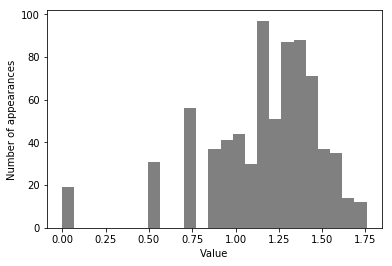

In [17]:

ok1 = """Features X[:, 1] and X[:, 2] have similar properties as above X[:,0]. This kind of distribution of values (many small ones and a few very large ones) is very common in practice. However, it is something most linear models can’t handle very well. Let’s try to fit a ridge regression to this model:"""
print(ok1)
print("\n")
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("R-squared score for test set: {:.3f}".format(score))


print("\n")
ok1 = """As you can see from the relatively low R2 score, Ridge was not able to really capture the relationship between X and y. Applying a logarithmic transformation can help, though. Because the value 0 appears in the data (and the logarithm is not defined at 0), we can’t actually just apply log, but we have to compute log(X + 1):"""
print(ok1)
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

print("\n")
ok2 = """After the transformation, the distribution of the data is less asymmetrical and doesn’t have very large outliers anymore"""
plt.hist(np.log(X_train_log[:, 0] + 1), bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [18]:
ok = """Building a ridge model on the new data provides a much better fit; better than the last one R-squared of 0.62."""
print(ok)
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Building a ridge model on the new data provides a much better fit; better than the last one R-squared of 0.62.
Test score: 0.875


In [19]:
ok = """Finding the transformation that works best for each combination of dataset and model is somewhat of an art. In this example, all the features had the same properties. This is rarely the case in practice, and usually only a subset of
the features should be transformed, or sometimes each feature needs to be transformed in a different way. As we mentioned earlier, these kinds of transformations are irrelevant for tree-based models but might be essential for linear models.
Sometimes it is also a good idea to transform the target variable y in regression. Trying to predict counts (say, number of orders) is a fairly common task, and using the log(y + 1) transformation often helps."""
print(ok)

Finding the transformation that works best for each combination of dataset and model is somewhat of an art. In this example, all the features had the same properties. This is rarely the case in practice, and usually only a subset of
the features should be transformed, or sometimes each feature needs to be transformed in a different way. As we mentioned earlier, these kinds of transformations are irrelevant for tree-based models but might be essential for linear models.
Sometimes it is also a good idea to transform the target variable y in regression. Trying to predict counts (say, number of orders) is a fairly common task, and using the log(y + 1) transformation often helps.


In [20]:
printbold("**Automatic Feature Selection**")

**Automatic Feature Selection**

In [21]:
ok = """When building a model, it is always a good idea to use only features which generalize the model better. There are
three basic strategies: 
•	univariate statistics
•	model-based selection and
•	iterative selection
Sklearn URL for the same- http://scikit-learn.org/stable/modules/feature_selection.html
"""
print(ok)

When building a model, it is always a good idea to use only features which generalize the model better. There are
three basic strategies: 
•	univariate statistics
•	model-based selection and
•	iterative selection
Sklearn URL for the same- http://scikit-learn.org/stable/modules/feature_selection.html



In [22]:
printbold("*Univariate Statistics*")
ok = """In Python we can use either SelectKBest, which selects a fixed number k of features, and SelectPercentile, which selects a fixed percentage of features. """
print(ok)


*Univariate Statistics*

In Python we can use either SelectKBest, which selects a fixed number k of features, and SelectPercentile, which selects a fixed percentage of features. 


Originally, we had 30 features, we added 50 noise features. Use f_classif for classifcation and f_regression for regression. percentile 50 means half vars out of 80 would be selected. 
X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


we can see which vars been selected using select.get_support which gives boolean list. In the visualization mask, black is true and white is false. Selectprntl has selected most of(not all though) original vars. We can create a Logit regression on both the datasets and ccheck accuracy


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True Fal

C:\Users\sohail.ahmad\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Sample index')

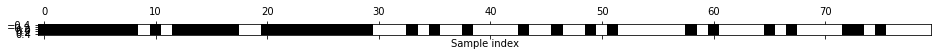

In [23]:
ok = """Originally, we had 30 features, we added 50 noise features. Use f_classif for classifcation and f_regression for regression. percentile 50 means half vars out of 80 would be selected. """
print(ok)
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 50% of features:
select = SelectPercentile(f_classif, percentile=50)
select.fit(X_train, y_train)
# transform training set:
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

###########  Looking at selected vars   ###############
print("\n")
ok1 = """we can see which vars been selected using select.get_support which gives boolean list. In the visualization mask, black is true and white is false. Selectprntl has selected most of(not all though) original vars. We can create a Logit regression on both the datasets and ccheck accuracy"""
print(ok1)
print("\n")
mask = select.get_support()
print(mask)
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")


In [24]:
##############   Comparative Logit Reg    #####################

ok2 = """Although some of the originals vars have been removed after selectprntl, yet removing noise from the data gives comparatively good results."""
print(ok2)

from sklearn.linear_model import LogisticRegression

# transform test data:
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

Although some of the originals vars have been removed after selectprntl, yet removing noise from the data gives comparatively good results.
Score with all features: 0.930
Score with only selected features: 0.940


C:\Users\sohail.ahmad\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [25]:
printbold("*Model Based Selection*")
print("More on SelectFromModel: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html")

*Model Based Selection*

More on SelectFromModel: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html


No. of trees is 100. We would select only those vars whose feature importance is median or higher of the  aggragted feature importance of whole vars




C:\Users\sohail.ahmad\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5,0,'Sample index')

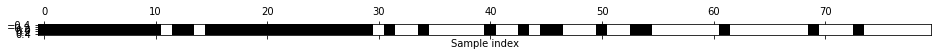

In [26]:
ok = """No. of trees is 100. We would select only those vars whose feature importance is median or higher of the  aggragted feature importance of whole vars"""
print(ok)
print("\n")
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),threshold="median")

# Now Let's fit the Model
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

# Lets look at the variables selected 
mask = select.get_support()
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [27]:
ok ="""Performance with selected vars improves the score a bit."""
print(ok)
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Performance with selected vars improves the score a bit.
Test score: 0.951


In [28]:
printbold("*Iterative Feature Selection*")
print("\n")
ok = """In univariate testing we used no model, while in model-based selection we used a single model to select features.

In iterative feature selection, a series of models are built, with varying numbers of features. There are two basic methods: starting with no features and adding features one by one until some stopping criterion is reached, or starting with all features and removing features one by one until some stopping criterion is reached."""
print(ok)

*Iterative Feature Selection*



In univariate testing we used no model, while in model-based selection we used a single model to select features.

In iterative feature selection, a series of models are built, with varying numbers of features. There are two basic methods: starting with no features and adding features one by one until some stopping criterion is reached, or starting with all features and removing features one by one until some stopping criterion is reached.


Running this code also takes significantly longer than that for the model-based selection, because a random forest model is trained 40 times, once for each feature that is dropped. After the vars have been selected, we use tranform  method in next block to select those vars in test and train set.


Text(0.5,0,'Sample index')

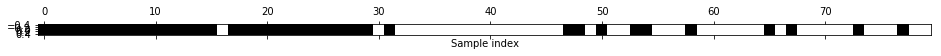

In [29]:
ok = """Running this code also takes significantly longer than that for the model-based selection, because a random forest model is trained 40 times, once for each feature that is dropped. After the vars have been selected, we use tranform  method in next block to select those vars in test and train set."""
print(ok)
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)

select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [30]:
Ok= """We can test the logreg results two ways. Either tranformsing train and test set and then make predictions. or simply, we can use the model used inside RFE. It will ensure only vars used inside RFE are used for prediction using function select.score()."""
print(Ok)
print("\n")
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))
print("Test score using the model used inside RFE: {:.3f}".format(select.score(X_test, y_test)))

We can test the logreg results two ways. Either tranformsing train and test set and then make predictions. or simply, we can use the model used inside RFE. It will ensure only vars used inside RFE are used for prediction using function select.score().


Test score: 0.951
Test score using the model used inside RFE: 0.951


In [31]:
print("There is a also time series bike rental problem and solution we aint gonna discuss here")

There is a also time series bike rental problem and solution we aint gonna discuss here


In [32]:
printbold("**That's it, bruh!! Read the notes for this chapter!!**")

**That's it, bruh!! Read the notes for this chapter!!**